In [1]:
%matplotlib inline
from datetime import datetime
import pandas as pd
import math
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
import numpy as np
from dateutil.relativedelta import relativedelta
from IPython.display import display, Markdown

In [2]:
# Read covid new cases data
df = pd.read_csv("data/data_2022-Aug-24.csv")
df = df[["date", "newCasesBySpecimenDate"]]
df["date"] = pd.to_datetime(df['date'])

In [3]:
# Data starts on 29th Jan with the first UK Covid case; backfill to 1st Jan
start_date = pd.to_datetime("2020-01-01")
min_date = pd.to_datetime(min(df.date))
days = (min_date - start_date).days
                          
fill_df = pd.DataFrame({"date": pd.date_range(start_date, periods=days), "newCasesBySpecimenDate": [0] * days})
df = pd.concat([df, fill_df])
df.set_index("date", inplace=True)
df.sort_index(ascending=True, inplace=True)

In [4]:
# Read significant OS dates (starts with 13th Mar 2020 BMJ blog post)
dates_from_os_timeline = pd.read_csv("data/os_dates.csv")
dates_from_os_timeline["date"] = pd.to_datetime(dates_from_os_timeline['date'])
dates_from_os_timeline.sort_values("date", inplace=True)

## 13 Mar 2020

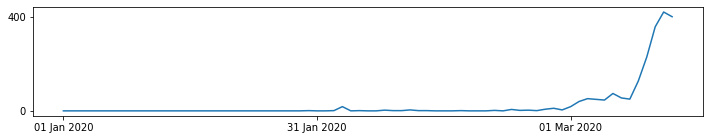

## 17 Mar 2020

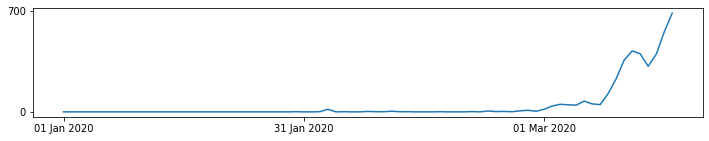

## 18 Mar 2020

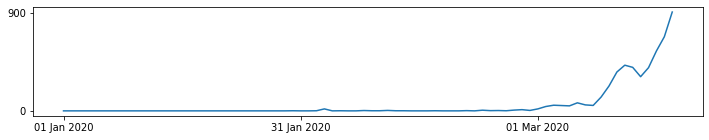

## 20 Mar 2020

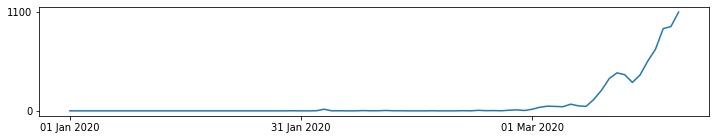

## 26 Mar 2020

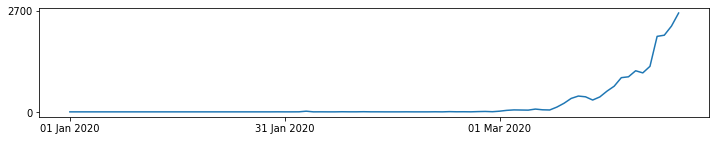

## 30 Mar 2020

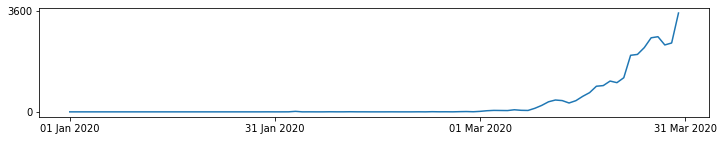

## 14 Apr 2020

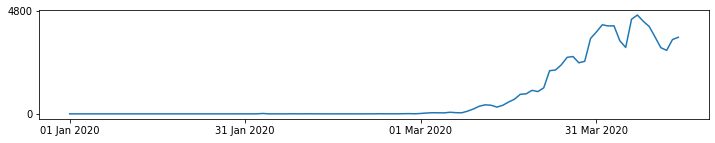

## 07 May 2020

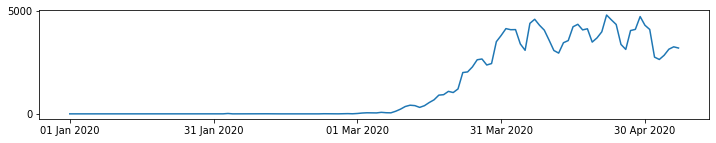

## 15 May 2020

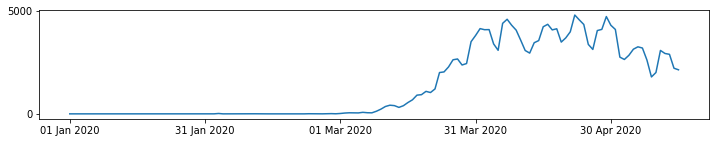

## 16 Jun 2020

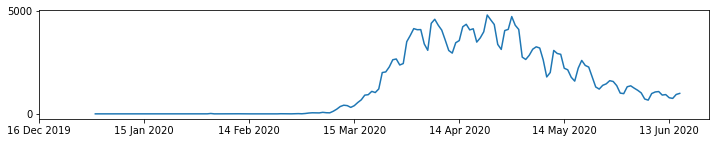

## 29 Jun 2020

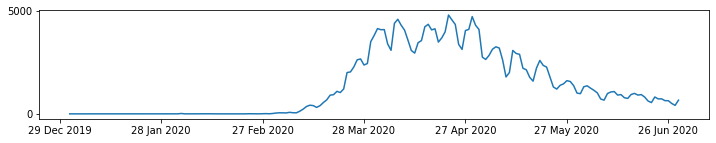

## 08 Jul 2020

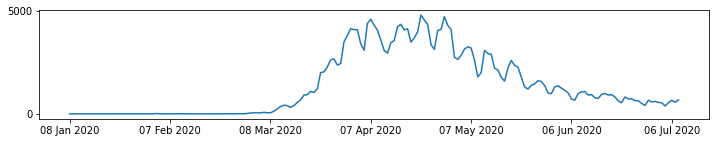

## 29 Jul 2020

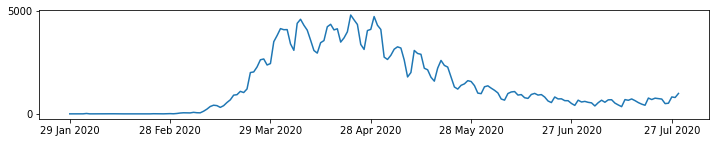

## 05 Nov 2020

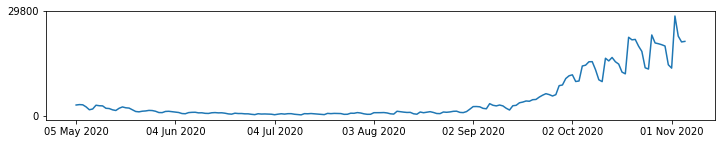

## 20 Nov 2020

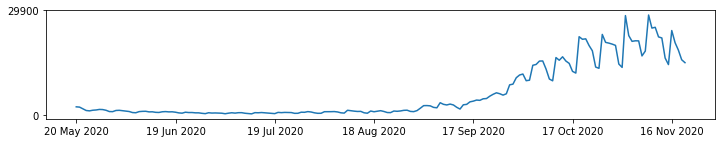

## 08 Dec 2020

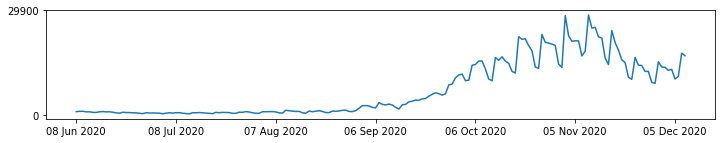

## 21 Jan 2021

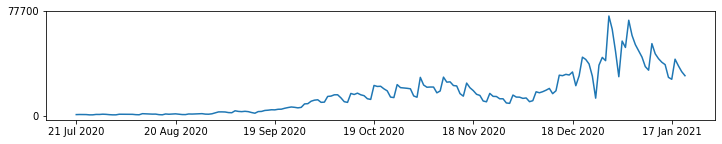

## 19 Feb 2021

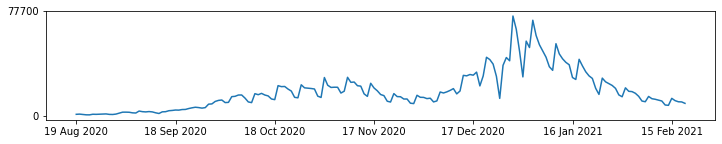

## 25 Mar 2021

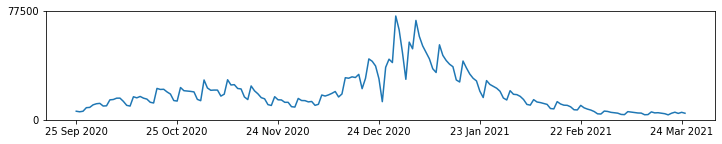

## 09 Apr 2021

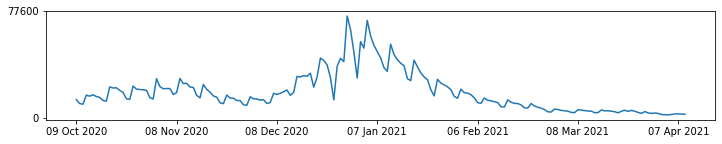

## 07 Jul 2021

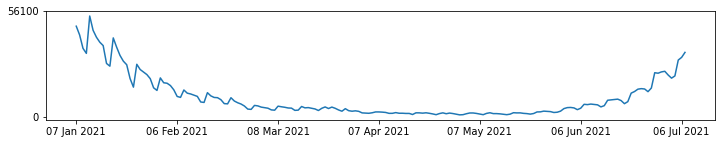

## 02 Feb 2022

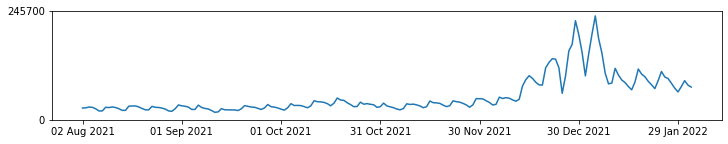

## 07 Feb 2022

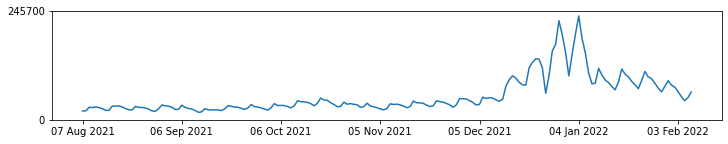

## 05 Apr 2022

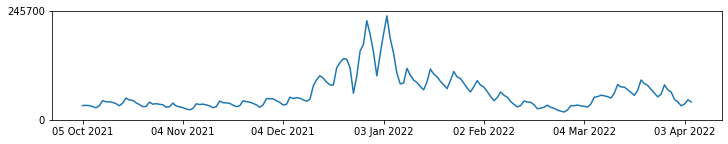

## 07 Apr 2022

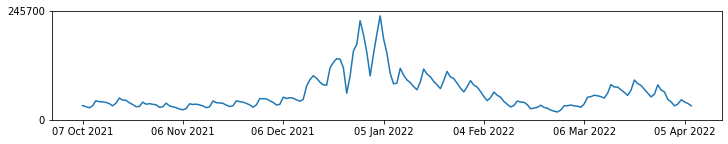

## 21 Apr 2022

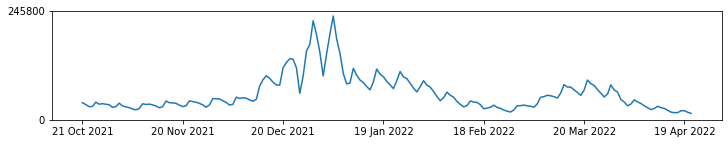

## 01 Jul 2022

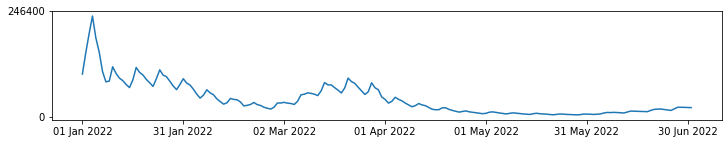

## 18 Sep 2022

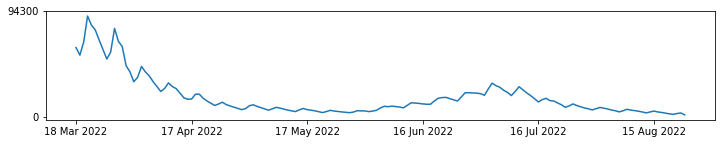

In [5]:
for date in dates_from_os_timeline.date:
    # Plot each OS-significant date with the preceding 6 months
    display(Markdown(f"## {date.strftime('%d %b %Y')}"))
    
    datefmt = "%Y-%m-%d"
    end_date = date.strftime(datefmt)
    if date < datetime(2020, 6, 1):
        start_date = "2020-01-01"
    else:
        start_date = date - relativedelta(months=6)
        start_date = start_date.strftime(datefmt)
    fig, ax = plt.subplots()
    df1 = df.loc[start_date: date.strftime(end_date)]
    plt.plot(df1)
    _, endx = ax.get_xlim()
    _, endy = ax.get_ylim()
    start = np.float64(np.datetime64(start_date))
    ax.xaxis.set_ticks(np.arange(start, endx, 30))
    ax.yaxis.set_ticks(np.arange(0, endy, math.floor(endy/100) * 100))
    ax.xaxis.set_major_formatter(DateFormatter('%d %b %Y'))

    fig = plt.gcf()
    fig.set_size_inches(12, 2)

    plt.show()